In [1]:
import pandas as pd
import networkx as nx
import osmnx as ox
import config
import random
import math
import util
import testing.helpers.testing_helper as test_helper




In [2]:
G = ox.load_graphml(filepath=f"{config.testing_graphml_path}/merged_routes.graphml")

# bool_replace = {"True": True, "False": False}
# nodes["community_route"] = nodes["community_route"].map(bool_replace).fillna(False)
# # merged_nodes["community_route"] = merged_nodes["community_route"].fillna(False)
# nodes["actual_stop"] = nodes["actual_stop"].map(bool_replace).fillna(False)

In [3]:
%%time
# get sets of generated and real bus stops
nodes, edges = ox.graph_to_gdfs(G)
nodes = nodes.replace({"True": True, "False": False})
actual_stops = nodes[nodes["actual_stop"] == True]
generated_stops = nodes[(nodes["community_route"] == True) |
                        (nodes["connection"] == True)]

CPU times: user 1.22 s, sys: 32.9 ms, total: 1.25 s
Wall time: 1.26 s


In [89]:
len(actual_stops)

122

In [90]:
len(generated_stops)

650

In [4]:
# determine sample size to use
population_data = pd.read_csv(f"{config.population_data_path}/donegal_townlands_all_coordinates.csv")
total_population = sum(population_data["population"])

# Cochran’s theorem
sample_size = test_helper.sample_size(int(total_population),
                                      margin_error=.05,
                                      confidence_level=.95)
sample_size

383.23017177926187

In [5]:
# round sample size up to 384
sample_size = math.ceil(sample_size)

# select pseudorandom sample nodes
random.seed(123)
all_stops = actual_stops["osmid"].tolist() + generated_stops["osmid"].tolist()
nodes_to_sample_from = nodes.query("osmid not in @all_stops")["osmid"].tolist()
%time sample_nodes = random.sample(nodes_to_sample_from, sample_size)

CPU times: user 395 µs, sys: 0 ns, total: 395 µs
Wall time: 411 µs


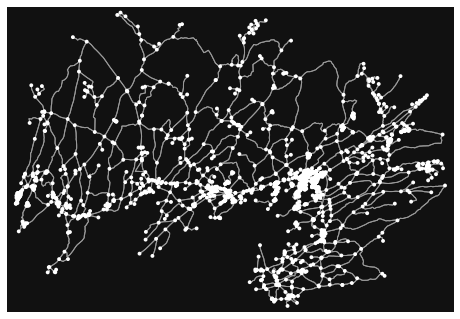

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe692256250>)

In [104]:
# 20km radius
test = nx.generators.ego_graph(G, sample_nodes[35], radius=20000, distance="length")
ox.plot_graph(test)

In [105]:
nodes, edges = ox.graph_to_gdfs(test)
nodes = nodes.replace({"True": True, "False": False})

actual_stops_present = list(set(actual_stops["osmid"]).intersection(nodes["osmid"]))
gen_stops_present = list(set(generated_stops["osmid"]).intersection(nodes["osmid"]))

15279.158000000001 - [7492743026, 7492742742, 2178750163, 1925759814, 1924398697, 1924396013, 1924395855, 2012969811, 1924395822, 1924395976, 5405401902, 5405401844, 1924390218, 1924390314, 1924371558, 1924371622, 258670337, 1693878100, 2644069746, 1693878111, 258670350, 7575099778, 7575099782, 7575099781, 1925715356, 2922107787, 258670378, 1925937184, 1925715364, 1924400708, 258672688, 2396723000, 258672620, 7489926711, 2503643652, 2503623050, 258672486, 1417665150, 2503657628, 5409921160, 1630088715, 1630088793, 258672405, 1630088713, 258672355, 1575258834, 1574288969, 2115650777, 2115650539, 5188167899, 5188167821, 2115650403, 2115649963, 2115650201, 2115650176]


KeyError: 15279.158000000001

In [106]:
actual_stops_shortest_path, actual_stops_shortest_path_weight = \
    test_helper.find_shortest_path_to_destinations(test,
                                                   sample_nodes[35],
                                                   actual_stops_present)
actual_stops_shortest_path_weight
# for stop in actual_stops_present:
#     for path in nx.all_shortest_paths(test, sample_nodes[300], stop, weight="length"):
#         weight = route_helper.path_weight(test, path, weight="length")
#         if actual_stops_shortest_path_weight is None or \
#                 weight < actual_stops_shortest_path_weight:
#             actual_stops_shortest_path = path
#             actual_stops_shortest_path_weight = weight
# actual_stops_shortest_path_weight

13018.248000000005 - [4221644835, 4221644841, 1917682482, 1917682340, 1917682465, 1918385411, 1918385299, 1917681883, 1918385094, 2295582219, 3218325775, 2295582279, 3218325889, 3218325896, 7685364245, 4704555108, 3218325919, 7685364264, 3218325928, 3218325933, 3218325982, 3218326015, 3218326053, 33216627, 1230024169, 3218326067, 2114915911, 1230024171, 3215268514, 33216631, 33216106, 6498536310, 33216103, 6498536308, 33216102, 33216100, 491962313, 491946852, 33216095, 33216093, 3121637162, 3121637153, 2437966595, 33216081, 1903151119, 1302425473, 2394565751, 2295582225, 1900861336, 1302425386, 1900861323, 6493907709, 6493907699, 184143287, 3219709227, 3219709225, 3219709107, 1903150964, 33216033, 3219709034, 33216030, 3219709028, 790484684, 33216027, 3219708981, 3219708941, 33216012, 3219708936, 3219708932, 3219708912, 3219708905, 3219708896]
7666.989000000004 - [4221644835, 4221644841, 1917682482, 1917682340, 1917682465, 1918385411, 1918385299, 1917681883, 1918385094, 2295582219, 321

2587.1580000000004

In [108]:
%%time


gen_stops_shortest_path, gen_stops_shortest_path_weight = \
    test_helper.find_shortest_path_to_destinations(test,
                                                   sample_nodes[35],
                                                   gen_stops_present)
gen_stops_shortest_path_weight

3542.2079999999996 - [4221644835, 4221644841, 1917682482, 1917682340, 1917682465, 1918385411, 1918385299, 1917681883, 1918385094, 2295582219]
7253.089000000002 - [4221644835, 4221644841, 1917682482, 1917681859, 2417764843, 1918384762, 1383709936, 1916882994, 1916883143, 1916883182, 1918678894, 2417764632, 1435301481, 2417764376, 2417764753, 1916883217, 1918385230, 1916882892, 1383710471, 2020241346, 1383710505, 458512279, 1918385115, 33216541, 262547621, 2020241422]
19297.33100000001 - [4221644835, 4221644841, 1917682482, 1917682340, 1917682465, 1918385411, 1918385299, 1917681883, 1918385094, 2295582219, 3218325775, 2295582279, 3218325889, 3218325896, 7685364245, 4704555108, 3218325919, 7685364264, 3218325928, 3218325933, 3218325982, 3218326015, 3218326053, 33216627, 1230024169, 3218326067, 2114915911, 1230024171, 3215268514, 33216631, 33216106, 6498536310, 33216103, 6498536308, 33216102, 33216100, 491962313, 491946852, 33216095, 33216093, 3121637162, 3121637153, 2437966595, 33216081, 

2483.3630000000003

In [6]:
%%time

results_list = []
for node in sample_nodes:
    # 20km radius graph
    graph = nx.generators.ego_graph(G, node, radius=20000, distance="length")

    # get the stops that are in the sub-graph
    nodes = ox.graph_to_gdfs(graph, edges=False)
    nodes = nodes.replace({"True": True, "False": False})
    actual_stops_present = list(set(actual_stops["osmid"]).intersection(nodes["osmid"]))
    gen_stops_present = list(set(generated_stops["osmid"]).intersection(nodes["osmid"]))

    # path to closest actual stop
    actual_stops_shortest_path, actual_stops_shortest_path_weight = \
    test_helper.find_shortest_path_to_destinations(graph,
                                                   node,
                                                   actual_stops_present,
                                                   print_all=False)
    # path to closest generated stop
    gen_stops_shortest_path, gen_stops_shortest_path_weight = \
    test_helper.find_shortest_path_to_destinations(graph,
                                                   node,
                                                   gen_stops_present,
                                                   print_all=False)

    # add to results
    results_list.append({"sample_node": node,
                         "actual_stops_sp": actual_stops_shortest_path,
                         "actual_stops_sp_length": actual_stops_shortest_path_weight,
                         "gen_stops_sp": gen_stops_shortest_path,
                         "gen_stops_sp_length": gen_stops_shortest_path_weight})
results_df = pd.DataFrame(results_list)
results_df

CPU times: user 10min 47s, sys: 299 ms, total: 10min 47s
Wall time: 10min 49s


,sample_node,actual_stops_sp,actual_stops_sp_length,gen_stops_sp,gen_stops_sp_length
0,2278757178,"[2278757178, 2278757361, 2278757246, 227875714...",2245.646,"[2278757178, 2278757361, 2278757277]",832.667
1,1904040588,"[1904040588, 798328666, 7253395031, 1898286475...",2506.408,"[1904040588, 798328666, 7253395031, 1898286475...",2845.778
2,297868880,"[297868880, 2907242390, 7802305624, 1514179638...",5033.933,"[297868880, 1932681415, 1908450546, 4336748172...",3724.643
3,1892322735,"[1892322735, 1892322799, 1892322916, 189232303...",4151.386,"[1892322735, 1892322799, 1892322916, 189232303...",1115.602
4,1904040518,"[1904040518, 1904040595, 1904040796, 190311062...",10499.277,"[1904040518, 1904040595, 1904040796, 190311062...",1697.278
...,...,...,...,...,...
379,2010496006,"[2010496006, 1947972798, 2439310437, 266230562...",3286.385,"[2010496006, 1947972798, 2439310437, 266230562...",3681.424
380,821248486,"[821248486, 821223301, 821217044, 821238929, 8...",4474.911,"[821248486, 819181989]",363.581
381,814508608,"[814508608, 814508418, 814508423, 814508670, 8...",1269.987,"[814508608, 814508418, 814508423, 814508670, 8...",1279.166
382,258454085,"[258454085, 258454102, 309927034, 258454188]",1405.846,"[258454085, 258454102, 309927034, 258454188]",1405.846


In [8]:
results_df.to_csv(f"{config.testing_path}/"
                  f"results/results_seed123.csv")

In [ ]:
routes = [actual_stops_shortest_path, gen_stops_shortest_path]
rc = ['r', 'y']
fig, ax = ox.plot_graph_routes(test, routes,
                               route_colors=rc,
                               route_linewidth=6,
                               node_size=0)

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

sample_node = nodes[nodes["osmid"] == sample_nodes[300]]
gen_stops = nodes[nodes["community_route"] == True]
ll_stops = nodes[nodes["actual_stop"] == True]
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_facecolor("black")

plt.rc("legend", fontsize=25,
       facecolor="black")

edges.plot(
    ax=ax,
    edgecolor="grey",
    linewidth=1,
    facecolor="none",
    zorder=1,
    alpha=0.8
)

gen_stops.plot(
    ax=ax,
    marker="o",
    markersize=100,
    #column="community",
    #cmap="hsv",
    zorder=2,
    #legend=legend,
    categorical=True
)

ll_stops.plot(
    ax=ax,
    marker="o",
    markersize=100,
    #column="community",
    #cmap="hsv",
    zorder=2,
    #legend=legend,
    categorical=True
)

sample_node.plot(
    ax=ax,
    marker=7,
    markersize=200,
    #column="community",
    #cmap="hsv",
    zorder=2,
    #legend=legend,
    categorical=True
)

In [ ]:
##################
# analysis  - mean distance to a bus stop in either system
#           -